https://www.youtube.com/watch?v=1uv0xERKt2A

In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
import seaborn as sns

In [145]:
data = pd.read_csv('properties.csv')

In [146]:
data.head(10)

,market_value,total_livable_area,zip_code
0,100.0,NaN,19146.0
1,29400.0,NaN,19146.0
2,14200.0,NaN,19146.0
3,5200.0,NaN,19146.0
4,21000.0,NaN,19146.0
5,9800.0,NaN,19146.0
6,10500.0,NaN,19146.0
7,730000.0,2064.0,19146.0
8,309800.0,524.0,19103.0
9,570400.0,2716.0,19128.0


In [147]:
data.shape

(581191, 3)

In [148]:
data.describe()

,market_value,total_livable_area,zip_code
count,5.809750e+05,5.787240e+05,581152.000000
mean,2.936301e+05,2.269228e+03,19133.378686
std,3.025632e+06,1.683704e+04,183.494751
min,0.000000e+00,0.000000e+00,19102.000000
25%,6.850000e+04,1.032000e+03,19123.000000
50%,1.295000e+05,1.234000e+03,19134.000000
75%,2.164000e+05,1.592000e+03,19144.000000
max,4.541974e+08,2.500000e+06,88888.000000


In [149]:
data.isnull().any()

market_value          True
total_livable_area    True
zip_code              True
dtype: bool

In [150]:
data.isnull().sum()

market_value           216
total_livable_area    2467
zip_code                39
dtype: int64

In [151]:
# Replace null values using sklearn imputer for numerical columns, drop null for zip code
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
data['market_value'] = imputer.fit_transform(data[['market_value']])
data['total_livable_area'] = imputer.fit_transform(data[['total_livable_area']])
data = data.dropna()

In [152]:
data.isnull().any()

market_value          False
total_livable_area    False
zip_code              False
dtype: bool

In [153]:
data.isnull().sum()

market_value          0
total_livable_area    0
zip_code              0
dtype: int64

In [154]:
# drop rows with 88888 and 19192 zipcode
data.drop(data[data.zip_code == 88888].index, inplace=True)
data.drop(data[data.zip_code == 19192].index, inplace=True)
data.describe()

,market_value,total_livable_area,zip_code
count,5.811450e+05,5.811450e+05,581145.000000
mean,2.926796e+05,2.265557e+03,19132.898265
std,3.005695e+06,1.674380e+04,13.414036
min,0.000000e+00,0.000000e+00,19102.000000
25%,6.860000e+04,1.034000e+03,19123.000000
50%,1.295000e+05,1.238000e+03,19134.000000
75%,2.165000e+05,1.600000e+03,19144.000000
max,4.541974e+08,2.500000e+06,19154.000000


In [155]:
# drop rows with 0 values
data.drop(data[data.market_value == 0].index, inplace=True)
data.drop(data[data.total_livable_area == 0].index, inplace=True)

In [156]:
data.describe()

,market_value,total_livable_area,zip_code
count,5.380350e+05,5.380350e+05,538035.000000
mean,3.012825e+05,2.443520e+03,19133.088256
std,3.006010e+06,1.737362e+04,13.544476
min,1.000000e+02,1.000000e+01,19102.000000
25%,7.850000e+04,1.084000e+03,19123.000000
50%,1.362000e+05,1.280000e+03,19134.000000
75%,2.226000e+05,1.650000e+03,19145.000000
max,4.541974e+08,2.500000e+06,19154.000000


Text(0, 0.5, 'Market value')

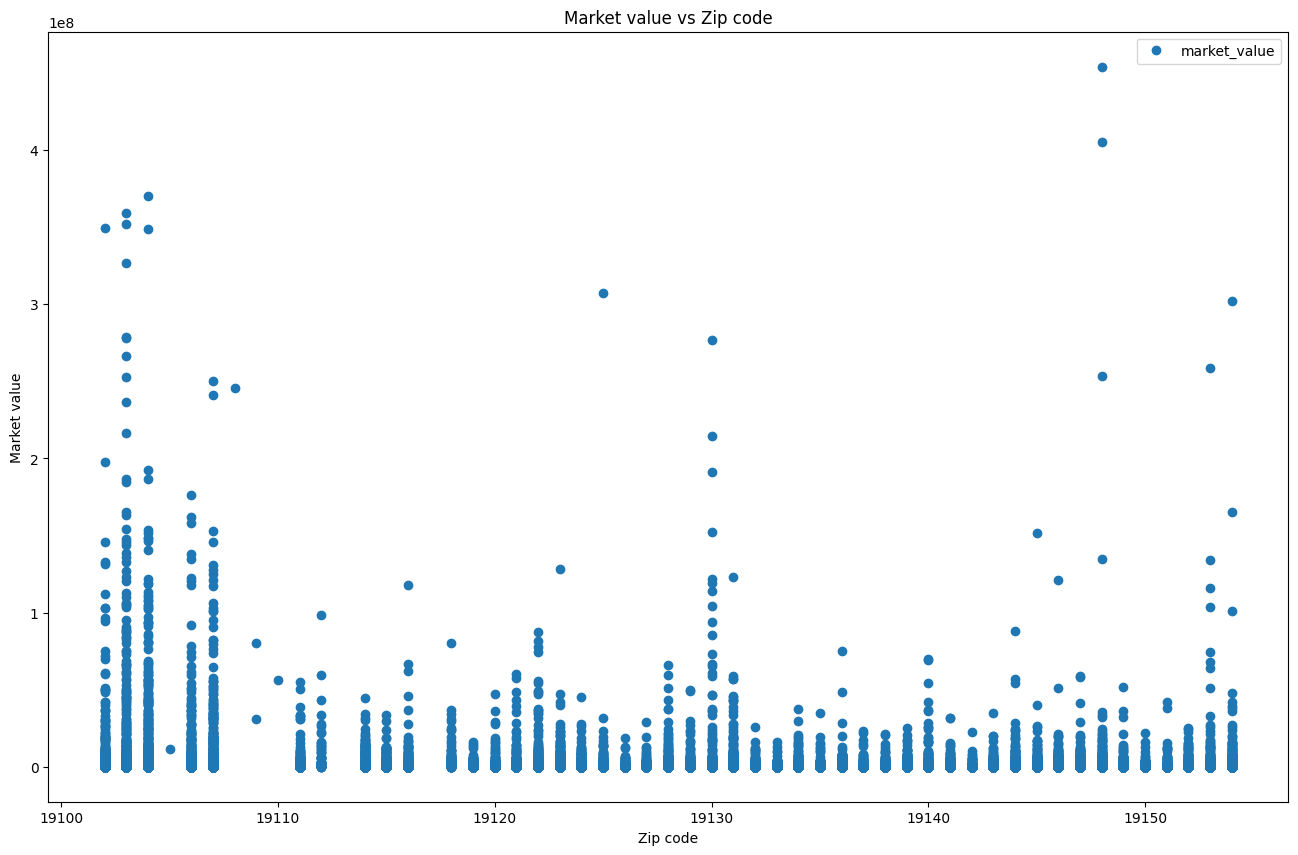

In [161]:
data.plot(x='zip_code', y='market_value', style='o', figsize=(16,10))
plt.title("Market value vs Zip code")
plt.xlabel("Zip code")
plt.ylabel("Market value")

Text(0.5, 0, 'Market value')

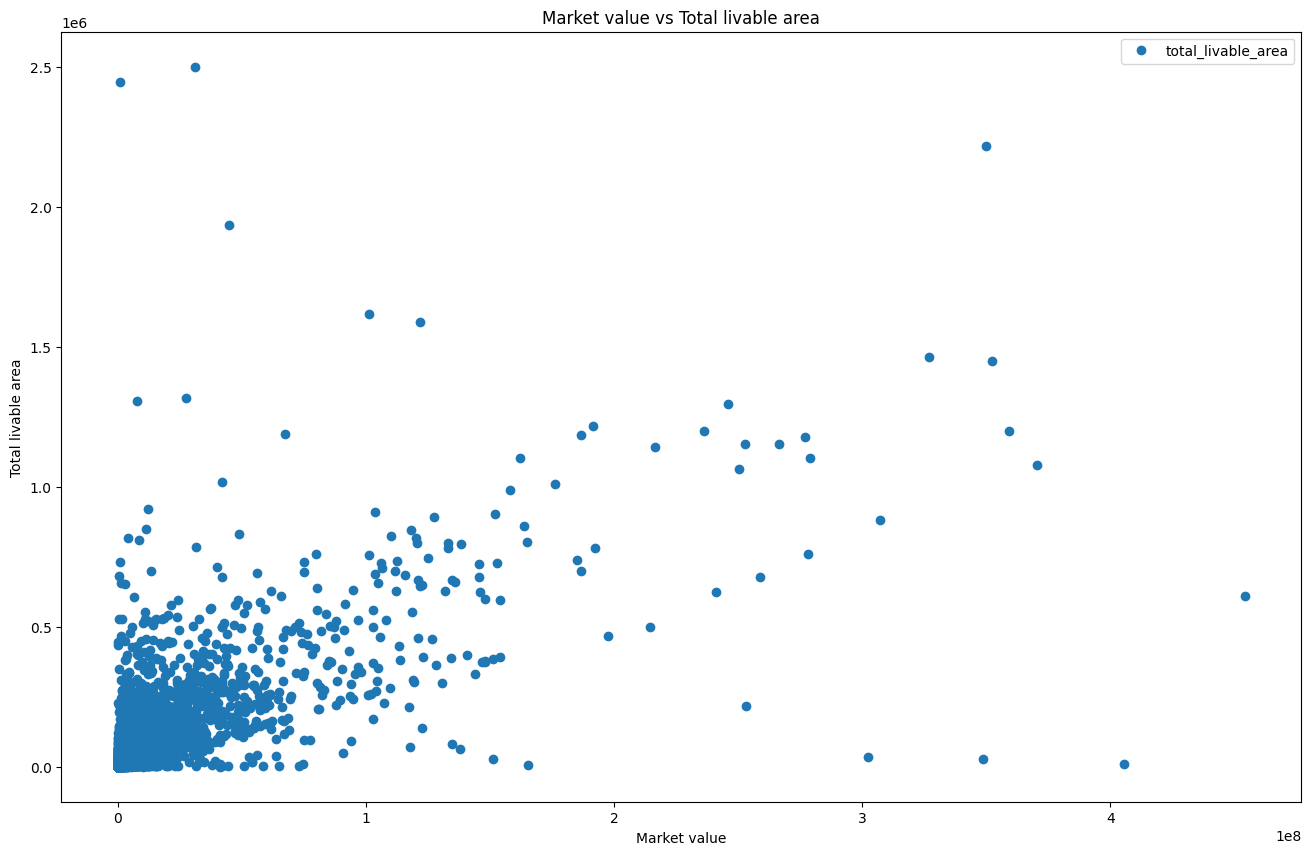

In [164]:
data.plot(x="market_value", y="total_livable_area", style="o", figsize=(16,10))
plt.title("Market value vs Total livable area")
plt.ylabel("Total livable area")
plt.xlabel("Market value")

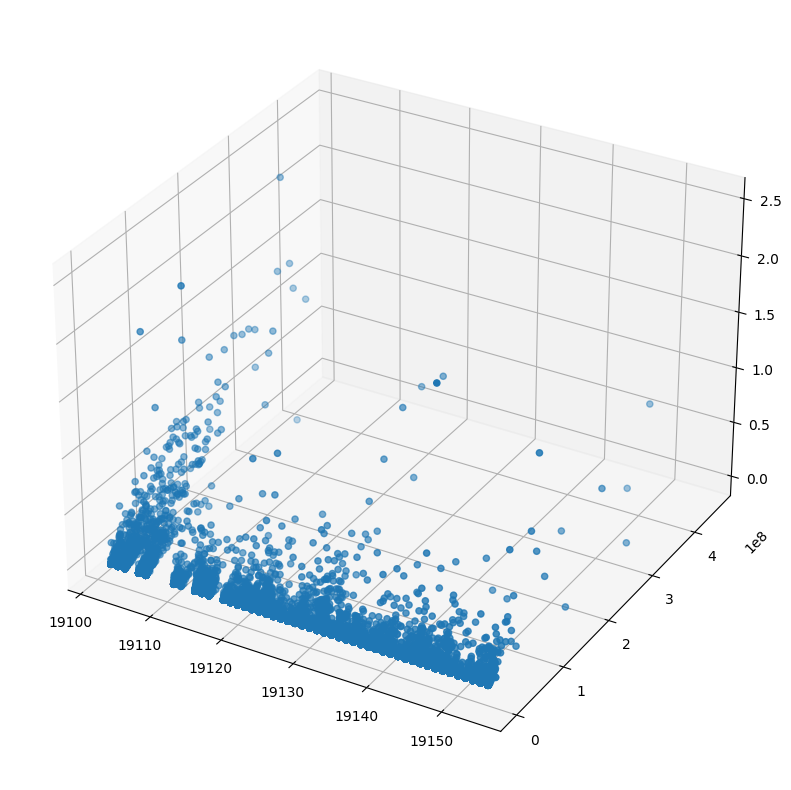

In [166]:
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(data['zip_code'], data['market_value'], data['total_livable_area'])
plt.show()

In [172]:
X = scale(data.copy(deep=True))

In [173]:
# KMeans to find 3 clusters (low, medium, high income zip codes)
clf = KMeans(n_clusters=3)

In [174]:
# fit to train
clf.fit(X)

C:\Users\Deniz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [175]:
pred = clf.predict(X)

In [176]:
# results
data['clusters'] = pred

In [180]:
data.head(20)

,market_value,total_livable_area,zip_code,clusters
0,1.000000e+02,2269.227511,19146.0,1
1,2.940000e+04,2269.227511,19146.0,1
2,1.420000e+04,2269.227511,19146.0,1
3,5.200000e+03,2269.227511,19146.0,1
4,2.100000e+04,2269.227511,19146.0,1
5,9.800000e+03,2269.227511,19146.0,1
6,1.050000e+04,2269.227511,19146.0,1
7,7.300000e+05,2064.000000,19146.0,1
8,3.098000e+05,524.000000,19103.0,0
9,5.704000e+05,2716.000000,19128.0,0


<AxesSubplot: xlabel='clusters', ylabel='count'>

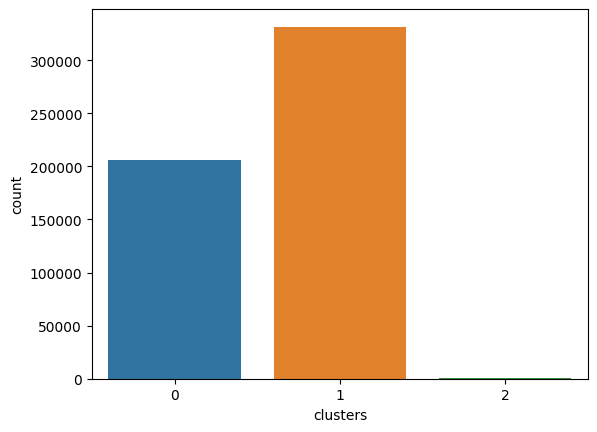

In [189]:
sns.countplot(x='clusters', data=data)

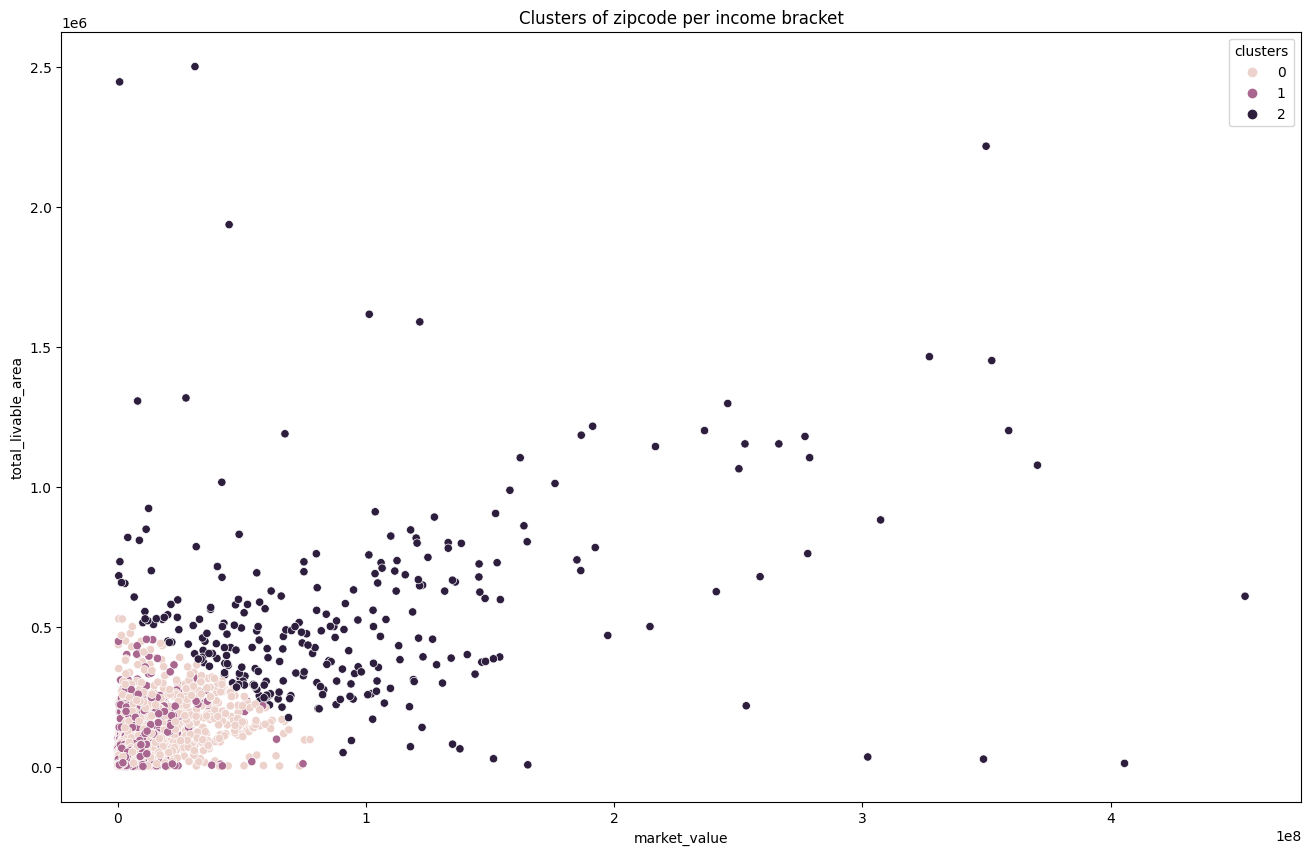

In [190]:
plt.figure(figsize=(16,10))
plt.title('Clusters of zipcode per income bracket')
sns.scatterplot(data=data, x='market_value', y='total_livable_area', hue='clusters')
plt.show()

In [191]:
sum_of_square_distance = []
for i in range(1,10):
    km_model = KMeans(n_clusters=i)
    km_model.fit_transform(X)
    sum_of_square_distance.append(km_model.inertia_)

C:\Users\Deniz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Deniz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Deniz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Deniz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

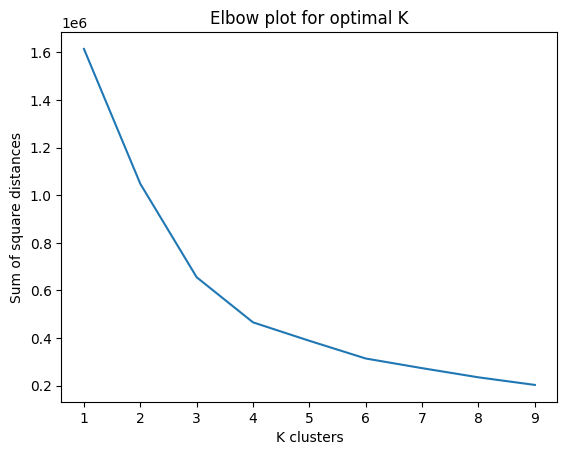

In [192]:
k_range = range(1,10)
plt.plot(k_range, sum_of_square_distance)
plt.xlabel('K clusters')
plt.ylabel('Sum of square distances')
plt.title('Elbow plot for optimal K')
plt.show()

In [193]:
# 6 income brackets are defined per this website:
# https://www.thebalancemoney.com/definition-of-middle-class-income-4126870
clf = KMeans(n_clusters=6)
clf.fit_transform(X)

C:\Users\Deniz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([[8.35867840e-02, 2.38652392e+00, 4.58263842e+01, 1.19078247e+00,
        1.07869464e+02, 1.33211339e+01],
       [7.64643570e-02, 2.38610570e+00, 4.58196637e+01, 1.19033126e+00,
        1.07861011e+02, 1.33158717e+01],
       [8.00902888e-02, 2.38631770e+00, 4.58231500e+01, 1.19055540e+00,
        1.07865396e+02, 1.33186009e+01],
       ...,
       [1.02845742e+00, 1.37088816e+00, 4.54851708e+01, 3.18401271e-01,
        1.07561257e+02, 1.29416010e+01],
       [5.34871480e+00, 5.93106640e+00, 4.05688931e+01, 5.53724366e+00,
        1.03046972e+02, 8.11889864e+00],
       [9.47426920e-01, 2.33547460e+00, 4.48650403e+01, 1.34083205e+00,
        1.06940209e+02, 1.23767580e+01]])

In [194]:
pred = clf.predict(X)
data['clusters'] = pred
data.head(20)

,market_value,total_livable_area,zip_code,clusters
0,1.000000e+02,2269.227511,19146.0,0
1,2.940000e+04,2269.227511,19146.0,0
2,1.420000e+04,2269.227511,19146.0,0
3,5.200000e+03,2269.227511,19146.0,0
4,2.100000e+04,2269.227511,19146.0,0
5,9.800000e+03,2269.227511,19146.0,0
6,1.050000e+04,2269.227511,19146.0,0
7,7.300000e+05,2064.000000,19146.0,0
8,3.098000e+05,524.000000,19103.0,1
9,5.704000e+05,2716.000000,19128.0,3


<AxesSubplot: xlabel='clusters', ylabel='count'>

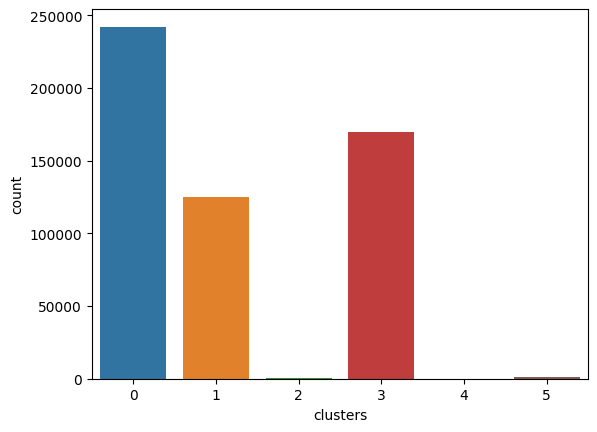

In [195]:
sns.countplot(x='clusters', data=data)

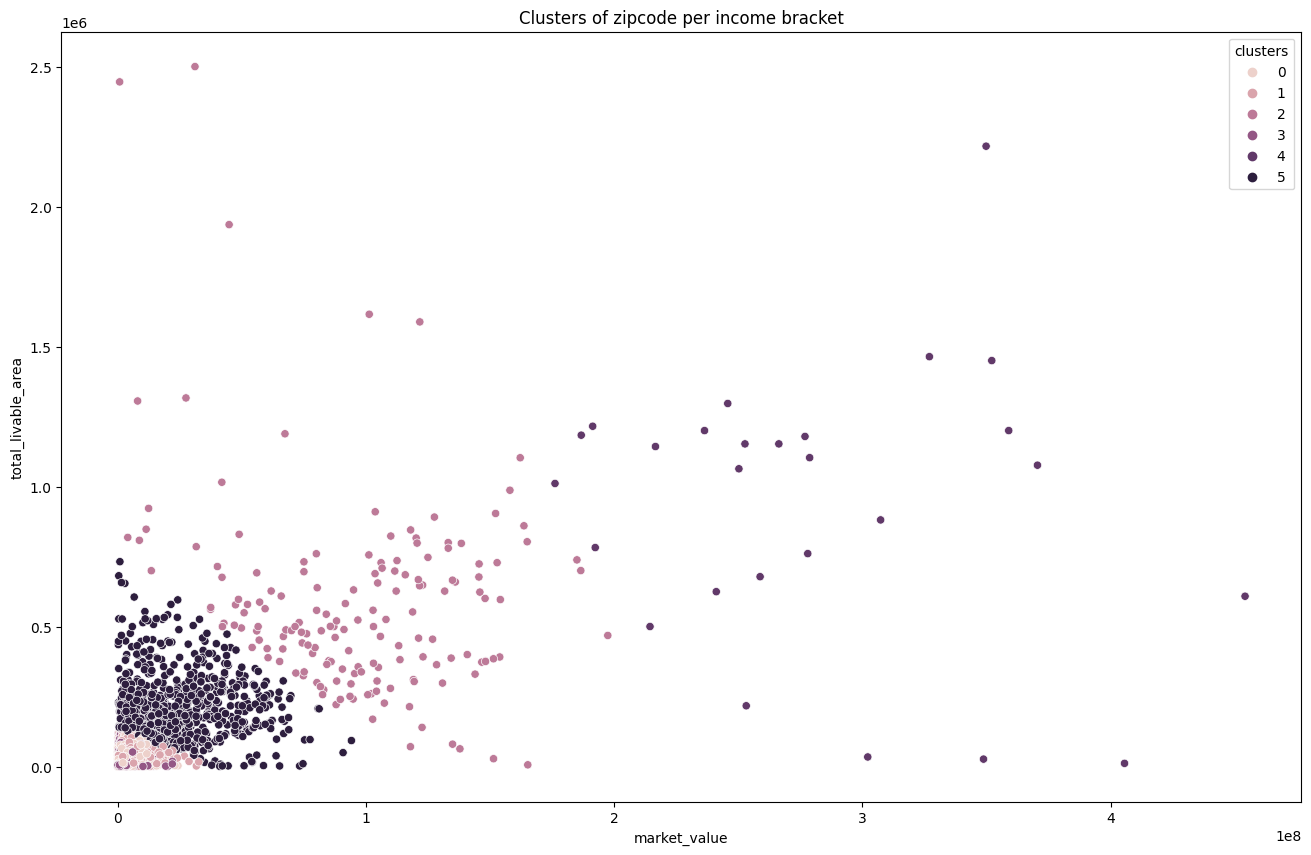

In [196]:
plt.figure(figsize=(16,10))
plt.title('Clusters of zipcode per income bracket')
sns.scatterplot(data=data, x='market_value', y='total_livable_area', hue='clusters')
plt.show()